# Purpose:
The purpose of the algorithm is not to generate the same graph but to generate a pruned graph that only includes the most important nodes based on their <b>Eigen Vector Centrality</b> scores. Eigen Vector Centrality is helpful for this because <b>it measures the importance of a node in a network by considering not only its direct connections, but also the importance of the nodes it is connected to</b>. This allows us to identify the most influential nodes in the network, which can be useful for various applications such as identifying key players in a social network or detecting important genes in a biological network.

### Note:
To understand this concept better, consider a social network where the nodes represent people and the edges represent friendships. If a person is friends with many other people who are themselves well-connected, that person is likely to have a high Eigen Vector Centrality score because they are connected to other important people in the network. On the other hand, if a person is friends with only a few people who are not well-connected, their Eigen Vector Centrality score will be lower.

In [50]:
import networkx as nx
import matplotlib.pyplot as plt
import similarity as sm

In [51]:
def enhance_graph_by_eigen_vector_centrality(G):
    # Computes the Eigen Vector Centrality scores for all nodes in the graph G 
    # using the eigenvector_centrality function from the NetworkX library. 
    # The result is a dictionary that maps each node to its corresponding Eigen Vector Centrality score.
    centrality = nx.eigenvector_centrality(G)
    # Here setting the threshold to 0.1. This means that it only retain nodes 
    # with an Eigen Vector Centrality score of 0.1 or higher.
    # Set a threshold value
    threshold = 0.1
    # Remove nodes with low Eigen Vector Centrality scores
    # It uses a list comprehension to select the important nodes based on their Eigen Vector Centrality scores. 
    # For each node n and its corresponding Eigen Vector Centrality score c in the centrality dictionary, 
    # the condition c >= threshold is checked. If this condition is True, the node is added to the important_nodes list. 
    # Otherwise, it is excluded.
    important_nodes = [n for n, c in centrality.items() if c >= threshold]
    # This generates a new graph pruned_G that only includes the important nodes and their corresponding edges 
    # using the subgraph function. This function takes a list of nodes as input and returns a new graph that 
    # only includes these nodes and their corresponding edges.
    reduced_graph = G.subgraph(important_nodes)
    removed_nodes=set(G.nodes-important_nodes)
    return reduced_graph,removed_nodes

In [52]:
def draw_graph(graph):
    fig, ax = plt.subplots(figsize=(6, 6))
    nx.draw_networkx(graph, pos=nx.spring_layout(graph, k=0.3), with_labels=True, node_size=100,font_size=10, node_color='yellow', edge_color='black', width=1.0, alpha=0.7, ax=ax)

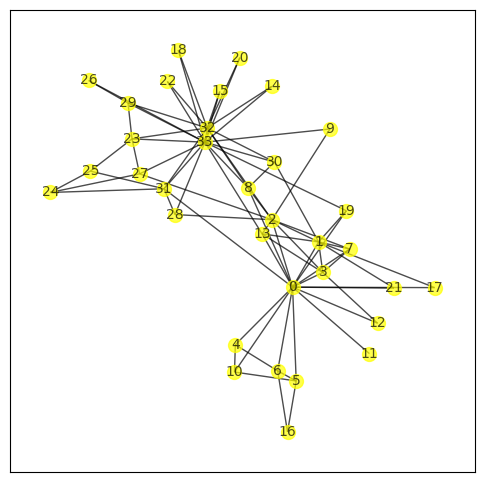

In [53]:
# Load Karate Club graph model
G = nx.karate_club_graph()
original_graph=G.copy()
draw_graph(G)

In [54]:
reduced_graph,removed_nodes=enhance_graph_by_eigen_vector_centrality(G)

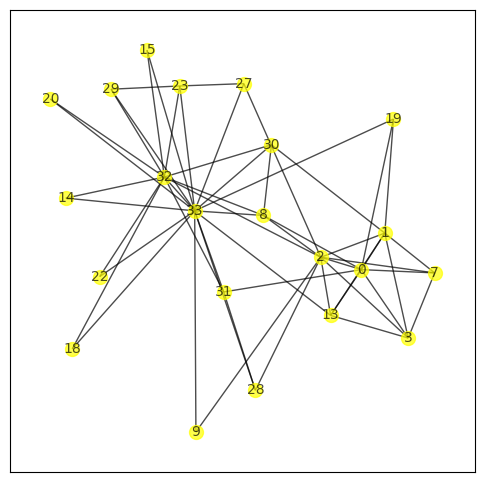

In [55]:
# Visualize the pruned graph
draw_graph(reduced_graph)

In [56]:
"""Calculating the similarity between the Graphs with respect to the parameter 'Betweenness Centrality'"""
print('Similarity of Betweenness Centrality is ',sm.compare_betweenness_centrality(original_graph,reduced_graph,removed_nodes),'%')

Similarity of Betweenness Centrality is  97.32 %


In [57]:
"""Calculating the similarity between the Graphs with respect to the parameter 'Degree Distribution'"""
print('Similarity of Degree Distribution is ',sm.compare_degree_distributions(original_graph,reduced_graph),'%')

Similarity of Degree Distribution is  97.84 %


In [58]:
"""Calculating the similarity between the Graphs with respect to the parameter 'Clustering Coefficient'"""
print('Similarity of Clustering Coefficient is ',sm.compare_clustering_coefficient(original_graph,reduced_graph),'%')

Similarity of Clustering Coefficient is  97.11 %


In [59]:
"""Calculating the similarity between the Graphs with respect to the parameter 'Eigen Vector Centrality'"""
print('Similarity of Eigen Vector Centrality is ',sm.compare_eigen_vector_centrality(original_graph,reduced_graph),'%')

Similarity of Eigen Vector Centrality is  99.53 %


In [60]:
"""Calculating the similarity between the Graphs with respect to the parameter 'Average Path Length'"""
print('Similarity of Average Path Length is ',sm.compare_average_path_length(original_graph,reduced_graph),'%')

Similarity of Average Path Length is  79.0 %


In [61]:
"""Calculating the Jaccard similarity between the Graphs with respect to the parameter 'Average Path Length'"""
print('Jaccard Similarity is ',sm.calculate_jaccard_similarity(original_graph,reduced_graph),'%')

Jaccard Similarity is  90.37 %
